In [1]:
# Base torch install with GPU (Colab's default CUDA is 11.8 or 12.1)
!pip install torch==2.2.2 torchvision==0.17.2 torchaudio==2.2.2 --index-url https://download.pytorch.org/whl/cu121

# PyG dependencies with CUDA 12.1
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.2.0+cu121.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.2.0+cu121.html
!pip install torch-cluster -f https://data.pyg.org/whl/torch-2.2.0+cu121.html
!pip install torch-geometric

# Supporting libraries
!pip install tree_sitter networkx pandas tqdm


Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 757.3/757.3 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 101.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 94.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 103.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 123.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 20.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 43.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/19

In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/devign_project/devign_tokens.csv')
print(df.shape)
df.head()


(27318, 5)


,id,code,input_ids,attention_mask,label
0,0,static av_cold int vdadec_init(AVCodecContext ...,"[0, 42653, 6402, 1215, 33912, 6979, 748, 417, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
1,1,static int transcode(AVFormatContext **output_...,"[0, 42653, 6979, 6214, 20414, 1640, 10612, 485...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
2,2,"static void v4l2_free_buffer(void *opaque, uin...","[0, 42653, 13842, 748, 306, 462, 176, 1215, 37...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
3,3,"int ff_get_wav_header(AVFormatContext *s, AVIO...","[0, 2544, 48400, 1215, 6460, 1215, 48479, 1215...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0
4,4,"int av_opencl_buffer_write(cl_mem dst_cl_buf, ...","[0, 2544, 6402, 1215, 12592, 3998, 1215, 47438...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0


In [2]:
from tree_sitter import Language

Language.build_library(
    'build/my-languages.so',
    ['tree-sitter-c']
)


/usr/local/lib/python3.11/dist-packages/tree_sitter/__init__.py:36: FutureWarning: Language.build_library is deprecated. Use the new bindings instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


True

In [5]:
!pip uninstall tree_sitter -y
!rm -rf tree-sitter-c build/


Found existing installation: tree-sitter 0.21.0
Uninstalling tree-sitter-0.21.0:
  Successfully uninstalled tree-sitter-0.21.0


In [6]:
# Reinstall tree_sitter (matching grammar version 14)
!pip install tree_sitter==0.20.4

# Redownload compatible C grammar (older commit)
!git clone https://github.com/tree-sitter/tree-sitter-c


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 490.5/490.5 kB 11.0 MB/s eta 0:00:00
Cloning into 'tree-sitter-c'...
remote: Enumerating objects: 2912, done.
remote: Counting objects: 100% (994/994), done.
remote: Compressing objects: 100% (156/156), done.
remote: Total 2912 (delta 906), reused 838 (delta 838), pack-reused 1918 (from 2)
Receiving objects: 100% (2912/2912), 17.70 MiB | 9.87 MiB/s, done.
Resolving deltas: 100% (1829/1829), done.


In [1]:
%cd tree-sitter-c
!git checkout 8f76d5f623b13d40d81b8e8fc29437523f3846de
%cd ..


/content/tree-sitter-c
fatal: reference is not a tree: 8f76d5f623b13d40d81b8e8fc29437523f3846de
/content


In [1]:
from tree_sitter import Language

Language.build_library(
    'build/my-languages.so',
    ['tree-sitter-c']
)


/usr/local/lib/python3.11/dist-packages/tree_sitter/__init__.py:36: FutureWarning: Language.build_library is deprecated. Use the new bindings instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


True

In [3]:
# Step 1: Install pycparser and networkx (if not already installed in the Colab environment)
!pip install pycparser networkx --quiet


In [4]:
# Re-install after Colab runtime reset
!pip install pycparser networkx --quiet


In [5]:
# Step 2: Upload the Devign CSV
from google.colab import files
uploaded = files.upload()


Saving devign_tokens.csv to devign_tokens.csv


In [15]:
# Step 3: Load and inspect the data
import pandas as pd

df = pd.read_csv("devign_tokens.csv")
# Include 'input_ids' in the selected columns
df = df[['id', 'code', 'input_ids', 'label']]
display(df.head())

,id,code,input_ids,label
0,0,static av_cold int vdadec_init(AVCodecContext ...,"[0, 42653, 6402, 1215, 33912, 6979, 748, 417, ...",0
1,1,static int transcode(AVFormatContext **output_...,"[0, 42653, 6979, 6214, 20414, 1640, 10612, 485...",0
2,2,"static void v4l2_free_buffer(void *opaque, uin...","[0, 42653, 13842, 748, 306, 462, 176, 1215, 37...",0
3,3,"int ff_get_wav_header(AVFormatContext *s, AVIO...","[0, 2544, 48400, 1215, 6460, 1215, 48479, 1215...",0
4,4,"int av_opencl_buffer_write(cl_mem dst_cl_buf, ...","[0, 2544, 6402, 1215, 12592, 3998, 1215, 47438...",0


In [16]:
from pycparser import c_parser, c_ast
import networkx as nx

parser = c_parser.CParser()

def ast_to_graph(ast_node, graph=None, parent=None):
    if graph is None:
        graph = nx.DiGraph()

    node_id = id(ast_node)
    label = type(ast_node).__name__
    graph.add_node(node_id, label=label)

    if parent:
        graph.add_edge(parent, node_id)

    for _, child in ast_node.children():
        ast_to_graph(child, graph, node_id)

    return graph

In [17]:
sample_code = df.iloc[0]['code']
try:
    ast = parser.parse(sample_code)
    G = ast_to_graph(ast)

    print("Graph created with", len(G.nodes), "nodes and", len(G.edges), "edges.")
except Exception as e:
    print("Parsing failed:", e)


Parsing failed: :1:16: before: int


In [18]:
import re

def sanitize_c_code(code):
    # Replace common external types with dummy types
    replacements = {
        r'AVCodecContext': 'int',
        r'AVFormatContext': 'int',
        r'cl_mem': 'int',
        r'uint8_t': 'unsigned char',
        r'int64_t': 'long',
        r'uint32_t': 'unsigned int',
        r'void\s*\*': 'int*',  # void* → int*
        r'__attribute__\s*\(\(.*?\)\)': '',  # Remove GCC attributes
    }

    for pattern, repl in replacements.items():
        code = re.sub(pattern, repl, code)

    return code


In [19]:
sample_code = sanitize_c_code(df.iloc[0]['code'])

try:
    ast = parser.parse(sample_code)
    G = ast_to_graph(ast)
    print("Graph created with", len(G.nodes), "nodes and", len(G.edges), "edges.")
except Exception as e:
    print("Parsing still failed:", e)


Parsing still failed: :1:16: before: int


In [12]:
# Install PyTorch Geometric and its dependencies (this takes ~2 mins)
!pip install torch-scatter -f https://data.pyg.org/whl/torch-2.2.2+cpu.html
!pip install torch-sparse -f https://data.pyg.org/whl/torch-2.2.2+cpu.html
!pip install torch-geometric


Looking in links: https://data.pyg.org/whl/torch-2.2.2+cpu.html
Looking in links: https://data.pyg.org/whl/torch-2.2.2+cpu.html


In [45]:
import torch
from torch_geometric.data import Data
import ast
from tqdm import tqdm

graph_list = []
# Use the calculated new_vocab_size
vocab_size = new_vocab_size

skipped_single_node = 0
skipped_invalid_tokens = 0

# Loop through each row of the dataset
for idx, row in tqdm(df.iterrows(), total=len(df)):
    try:
        input_ids = ast.literal_eval(row['input_ids'])
        label = int(row['label'])

        num_nodes = len(input_ids)

        # Skip graphs with only one node, as the current edge creation doesn't handle this
        if num_nodes <= 1:
            skipped_single_node += 1
            continue

        # Check for invalid token IDs
        if any(token_id >= vocab_size or token_id < 0 for token_id in input_ids):
             skipped_invalid_tokens += 1
             continue


        # Create edges: connect each token to the next (i → i+1)
        edge_index = torch.tensor([[i, i+1] for i in range(num_nodes - 1)], dtype=torch.long).t().contiguous()
        edge_index = torch.cat([edge_index, edge_index[[1, 0]]], dim=1)  # make edges bidirectional

        x = torch.tensor([[token_id] for token_id in input_ids], dtype=torch.long)  # shape: [num_nodes, 1]
        y = torch.tensor([label], dtype=torch.long)

        data = Data(x=x, edge_index=edge_index, y=y)
        graph_list.append(data)

    except Exception as e:
        print(f"Skipping row {idx} due to error: {e}")

print(f"Skipped {skipped_single_node} graphs with a single node.")
print(f"Skipped {skipped_invalid_tokens} graphs with invalid token IDs (>= {vocab_size} or < 0).")
print(f"Successfully created {len(graph_list)} graphs.")

100%|██████████| 27318/27318 [00:23<00:00, 1182.35it/s]

Skipped 0 graphs with a single node.
Skipped 0 graphs with invalid token IDs (>= 50247 or < 0).
Successfully created 27318 graphs.


In [47]:
from torch_geometric.data import DataLoader
from sklearn.model_selection import train_test_split

# Split into train/val/test (80/10/10)
train_graphs, temp_graphs = train_test_split(graph_list, test_size=0.2, random_state=42)
val_graphs, test_graphs = train_test_split(temp_graphs, test_size=0.5, random_state=42)

# Create DataLoaders
train_loader = DataLoader(train_graphs, batch_size=32, shuffle=True)
val_loader = DataLoader(val_graphs, batch_size=32)
test_loader = DataLoader(test_graphs, batch_size=32)


/usr/local/lib/python3.11/dist-packages/torch_geometric/deprecation.py:26: UserWarning: 'data.DataLoader' is deprecated, use 'loader.DataLoader' instead
  warnings.warn(out)


In [48]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn as nn

class GCNClassifier(nn.Module):
    def __init__(self, input_dim=1, hidden_dim=64, num_classes=2):
        super(GCNClassifier, self).__init__()
        self.conv1 = GCNConv(input_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index, batch = data.x.float(), data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))
        x = F.relu(self.conv2(x, edge_index))
        x = global_mean_pool(x, batch)
        return self.fc(x)


In [60]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# Use the GCNModel defined in cell vIMZSkbVTNj7 which includes an embedding layer
model = GCNModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
# Use the weighted loss function defined in cell SKsah_f7TA8G
loss_fn = criterion

def evaluate(loader):
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in loader:
            data = data.to(device)
            out = model(data)
            pred = out.argmax(dim=1)
            # Ensure data.y is on the same device as pred for comparison
            correct += (pred == data.y.to(device)).sum().item()
            total += data.num_graphs
    return correct / total

for epoch in range(1, 11):
    model.train()
    total_loss = 0
    for i, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()

        # Debugging: Check labels in each batch
        print(f"Epoch {epoch}, Batch {i}: data.y unique values: {torch.unique(data.y)}")
        print(f"Epoch {epoch}, Batch {i}: data.y max value: {torch.max(data.y)}")
        print(f"Epoch {epoch}, Batch {i}: data.y shape: {data.y.shape}")


        out = model(data)
        # Use the weighted loss function 'criterion'
        loss = loss_fn(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    val_acc = evaluate(val_loader)
    print(f"Epoch {epoch:02d} | Loss: {total_loss:.4f} | Val Acc: {val_acc:.4f}")

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [24]:
test_acc = evaluate(test_loader)
print(f"Final Test Accuracy: {test_acc:.4f}")


Final Test Accuracy: 0.4524


In [63]:
all_preds = []
all_labels = []

model.eval()
with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)
        pred = out.argmax(dim=1).detach().cpu().tolist()
        label = data.y.detach().cpu().tolist()
        all_preds.extend(pred)
        all_labels.extend(label)


In [33]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(all_labels, all_preds, digits=4))


              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000      1496
           1     0.4524    1.0000    0.6230      1236

    accuracy                         0.4524      2732
   macro avg     0.2262    0.5000    0.3115      2732
weighted avg     0.2047    0.4524    0.2818      2732



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


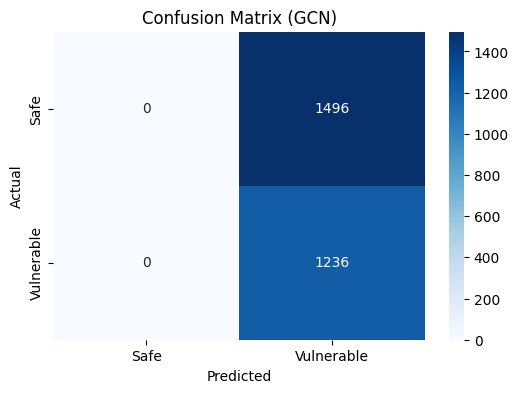

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Safe", "Vulnerable"], yticklabels=["Safe", "Vulnerable"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix (GCN)")
plt.show()


class balancing using weighted loss

In [36]:
import torch
import numpy as np

# Count class samples
labels = [data.y.item() for data in train_graphs] # Use train_graphs instead of train_dataset
class_counts = np.bincount(labels)
total = sum(class_counts)

# Compute weights: inverse frequency
class_weights = torch.tensor([total / c for c in class_counts], dtype=torch.float32)
print("Class weights:", class_weights)

Class weights: tensor([1.8433, 2.1858])


In [37]:
from torch.nn import CrossEntropyLoss

# Move to GPU if needed
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
class_weights = class_weights.to(device)

# Define weighted loss function
criterion = CrossEntropyLoss(weight=class_weights)


In [52]:
import torch.nn.functional as F
from torch_geometric.nn import GCNConv, global_mean_pool
import torch.nn as nn
import torch_geometric # Import torch_geometric

# Use the calculated new_vocab_size
class GCNModel(nn.Module):
    def __init__(self, vocab_size=new_vocab_size, embed_dim=64, hidden_dim=64, num_classes=2):
        super(GCNModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embed_dim)  # token ID to vector
        self.conv1 = GCNConv(embed_dim, hidden_dim)
        self.conv2 = GCNConv(hidden_dim, hidden_dim)
        self.fc = nn.Linear(hidden_dim, num_classes)

    def forward(self, data):
        x, edge_index = data.x.squeeze(1).long(), data.edge_index  # flatten to 1D
        batch = data.batch # Explicitly get the batch tensor

        x = self.embedding(x)  # [num_nodes, embed_dim]

        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        x = F.relu(x)

        # Global mean pooling
        x = torch_geometric.nn.global_mean_pool(x, batch) # Pass the explicit batch tensor
        out = self.fc(x)
        return out

In [42]:
model = GCNModel().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1, 11):
    model.train()
    total_loss = 0
    for data in train_loader:
        data = data.to(device)
        optimizer.zero_grad()
        out = model(data)
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_loader:
            data = data.to(device)
            out = model(data)
            pred = out.argmax(dim=1)
            correct += (pred == data.y).sum().item()
            total += data.num_graphs

    val_acc = correct / total
    print(f"Epoch {epoch:02d} | Loss: {total_loss:.4f} | Val Acc: {val_acc:.4f}")


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [40]:
# Load a sample graph from your dataset
sample_data = graph_list[0] # Use graph_list instead of dataset

# Print the shape of node features
print("Shape of data.x:", sample_data.x.shape)

# Preview some actual values
print("Sample node features (first few rows):")
print(sample_data.x[:5])

Shape of data.x: torch.Size([256, 1])
Sample node features (first few rows):
tensor([[    0],
        [42653],
        [ 6402],
        [ 1215],
        [33912]])


In [44]:
import ast
import numpy as np
from tqdm import tqdm

max_token_id = 0
for index, row in tqdm(df.iterrows(), total=len(df)):
    try:
        input_ids = ast.literal_eval(row['input_ids'])
        if input_ids: # Check if input_ids is not empty
             current_max = max(input_ids)
             if current_max > max_token_id:
                max_token_id = current_max
    except Exception as e:
        print(f"Error processing row {index}: {e}")

print(f"Maximum token ID found in the dataset: {max_token_id}")

# Set vocab_size to be max_token_id + 1
new_vocab_size = max_token_id + 1
print(f"Recommended vocabulary size: {new_vocab_size}")

100%|██████████| 27318/27318 [00:13<00:00, 1998.04it/s]

Maximum token ID found in the dataset: 50246
Recommended vocabulary size: 50247


In [57]:
labels = [data.y.item() for data in train_graphs] # Use train_graphs instead of train_dataset
print("Label set:", set(labels))

Label set: {0, 1}


In [62]:
device = torch.device('cpu')
model = GCNModel().to(device)

# Try one batch manually
sample = train_graphs[0].to(device)
output = model(sample)

print("Output shape:", output.shape)
print("Output tensor:", output)
print("Label:", sample.y)


Output shape: torch.Size([1, 2])
Output tensor: tensor([[-0.0913,  0.2654]], grad_fn=<AddmmBackward0>)
Label: tensor([1])


In [65]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCNModel().to(device)

# Redefine loss and optimizer
# Use class_weights calculated in cell chrFdzd-SUsq
weights = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float).to(device)
criterion = torch.nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Training loop
for epoch in range(1, 11):
    model.train()
    total_loss = 0
    for data in train_loader:
        try:
            data = data.to(device)
            optimizer.zero_grad()
            out = model(data)
            loss = criterion(out, data.y.long())  # Force labels to long
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        except Exception as e:
            print(f"Skipping a batch due to error: {e}")

    # Validation
    model.eval()
    correct = 0
    total = 0
    for data in val_loader:
        data = data.to(device)
        out = model(data)
        pred = out.argmax(dim=1)
        correct += (pred == data.y).sum().item()
        total += data.num_graphs

    val_acc = correct / total
    print(f"Epoch {epoch:02d} | Loss: {total_loss:.4f} | Val Acc: {val_acc:.4f}")

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [67]:
import numpy as np

# Calculate the maximum token ID in the graph_list
max_token_id = max([int(x.x.max()) for x in graph_list])
print("Max token ID in dataset:", max_token_id)

Max token ID in dataset: 50246


In [68]:
class GCNModel(torch.nn.Module):
    def __init__(self, vocab_size=50247, embedding_dim=64, hidden_channels=64, num_classes=2):
        super(GCNModel, self).__init__()
        self.embedding = torch.nn.Embedding(vocab_size, embedding_dim)
        self.conv1 = GCNConv(embedding_dim, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, num_classes)

    def forward(self, data):
        x, edge_index = data.x.squeeze(1), data.edge_index
        x = self.embedding(x)
        x = self.conv1(x, edge_index).relu()
        x = self.conv2(x, edge_index)
        return global_mean_pool(x, data.batch)


In [69]:
model = GCNModel().to(device)


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [70]:
model = GCNModel()

try:
    model.embedding = model.embedding.to(device)
    print("Embedding moved to GPU successfully")
except Exception as e:
    print("Failed at embedding:", e)


Failed at embedding: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.



In [72]:
MAX_TOKEN_ID = 50246  # adjust based on actual model vocab size

for data in graph_list: # Use graph_list instead of dataset
    data.x = torch.clamp(data.x, min=0, max=MAX_TOKEN_ID)

In [73]:
sample = graph_list[0]
print("Clamped sample token max:", sample.x.max())
print("Clamped sample token min:", sample.x.min())


Clamped sample token max: tensor(50140)
Clamped sample token min: tensor(0)


In [74]:
model = GCNModel(vocab_size=50247).to(device)


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [76]:
labels = torch.cat([data.y for data in graph_list])
print("Unique labels:", labels.unique())


Unique labels: tensor([0, 1])


In [77]:
model = GCNModel(vocab_size=50247).to("cpu")


In [78]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = GCNModel(vocab_size=50247).to(device)


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [79]:
device = torch.device('cpu')
model = GCNModel(vocab_size=50247).to(device)


In [84]:
# Explicitly define the device for this cell
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Redefine loss and optimizer
# Use class_weights calculated in cell chrFdzd-SUsq

print(f"Current device for weights: {device}") # Print the device

weights = torch.tensor([class_weights[0], class_weights[1]], dtype=torch.float).to(device)
criterion = torch.nn.CrossEntropyLoss(weight=weights)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Move model to device
model = GCNModel().to(device)


# Training loop
for epoch in range(1, 11):
    model.train()
    total_loss = 0
    for i, data in enumerate(train_loader):
        data = data.to(device)
        optimizer.zero_grad()

        # Debugging: Check labels in each batch
        # print(f"Epoch {epoch}, Batch {i}: data.y unique values: {torch.unique(data.y)}")
        # print(f"Epoch {epoch}, Batch {i}: data.y max value: {torch.max(data.y)}")
        # print(f"Epoch {epoch}, Batch {i}: data.y shape: {data.y.shape}")


        out = model(data)
        # Use the weighted loss function 'criterion'
        loss = criterion(out, data.y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    val_acc = evaluate(val_loader)
    print(f"Epoch {epoch:02d} | Loss: {total_loss:.4f} | Val Acc: {val_acc:.4f}")

Current device for weights: cuda


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.


In [85]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model.eval()
all_preds = []
all_labels = []

with torch.no_grad():
    for data in test_loader:
        data = data.to(device)
        out = model(data)
        preds = out.argmax(dim=1).detach().cpu().numpy()
        labels = data.y.detach().cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels)

# Metrics report
print("Classification Report:\n")
print(classification_report(all_labels, all_preds, digits=4))

# Confusion Matrix
cm = confusion_matrix(all_labels, all_preds)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call, so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.
Compile with `TORCH_USE_CUDA_DSA` to enable device-side assertions.
